In [23]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from numpy.random import default_rng

#dataset ou joueur 1 gagne tout le temps
df2=pd.read_csv("./../data_formatted/training_dgl_dataset.csv",low_memory=False)
df2.match_date = df2.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [24]:
#Evolution de la cote du joueur gagnant année par année
1/df2.groupby(df2.match_date.dt.year)["player1_oddsB365"].mean()

match_date
2001         NaN
2002    0.572597
2003    0.557673
2004    0.556958
2005    0.558795
2006    0.557902
2007    0.543543
2008    0.545982
2009    0.554220
2010    0.555051
2011    0.558128
2012    0.544007
2013    0.540912
2014    0.555634
2015    0.552932
2016    0.540670
2017    0.534456
2018    0.545328
2019    0.540345
2020    0.539809
2021    0.539164
2022    0.541810
2023    0.541055
Name: player1_oddsB365, dtype: float64

In [5]:
# optionnel : limité le nombre de match, chaque joueur doit avoir fait au moins X matchs
X = 6
df2 = df2[(df2.player1_plays > X) & (df2.player2_plays>X)]

1311

In [25]:
# Calcul du ROI en fonction du ratio de parties gagnées (en %)
ratio = 75
total = df2.shape[0]
df2 = df2.sort_values(by="player1_oddsB365")
won = round(ratio/100 * df2.shape[0])

moneylost=total
moneywon=0
gain = round(df2.iloc[:won]["player1_oddsB365"].sum()-moneylost)
print(total, gain, round(gain/total*100,2))

51981 4937 9.5


In [140]:
from sklearn.model_selection import train_test_split

X = df[["player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating",  "player1_height", "player1_weight", "player1_c1", "player1_c2","player1_c3","player1_c4","player1_c5", "player1_oddsB365",
        "player2_name", "player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_c1", "player2_c2","player2_c3","player2_c4","player2_c5","player2_oddsB365",
        "match_date"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#,  shuffle=False)


In [96]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

col_to_drop = ["player1_name", "player2_name", "match_date", "player1_oddsB365", "player2_oddsB365"]
X_train_filtered = X_train.drop(col_to_drop,axis=1)
X_test_filtered = X_test.drop(col_to_drop,axis=1)

scaler = MinMaxScaler()
col_to_minmax_scale = ["player1_plays", "player1_wins", "player1_losses","player1_elo", 
                       "player2_plays","player2_wins", "player2_losses", "player2_elo", ]
scaler.fit(X_train_filtered[col_to_minmax_scale])
X_train_filtered[col_to_minmax_scale] = scaler.transform(X_train_filtered[col_to_minmax_scale])
X_test_filtered[col_to_minmax_scale] = scaler.transform(X_test_filtered[col_to_minmax_scale])

scaler = StandardScaler()
col_to_std_scale = ["player1_age", "player1_atprank", "player1_elo", "player1_mean_serve_rating", "player1_height", "player1_weight", "player1_c1", "player1_c2","player1_c3","player1_c4","player1_c5",#"player1_oddsB365",
         "player2_age", "player2_atprank", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_c1", "player2_c2","player2_c3","player2_c4","player2_c5"]#"player2_oddsB365"
scaler.fit(X_train_filtered[col_to_std_scale])
X_train_filtered[col_to_std_scale] = scaler.transform(X_train_filtered[col_to_std_scale])
X_test_filtered[col_to_std_scale] = scaler.transform(X_test_filtered[col_to_std_scale])

X_train_filtered = pd.DataFrame(X_train_filtered)
X_test_filtered = pd.DataFrame(X_test_filtered)

X_train_filtered.head()

,player1_age,player1_atprank,player1_plays,player1_wins,player1_losses,player1_elo,player1_mean_serve_rating,player1_height,player1_weight,player1_c1,...,player2_losses,player2_elo,player2_mean_serve_rating,player2_height,player2_weight,player2_c1,player2_c2,player2_c3,player2_c4,player2_c5
1493,0.298706,1.151629,0.056101,0.019512,0.125561,-0.926769,-0.322885,-0.069757,-0.412553,0.0,...,0.045249,-0.466956,1.634612,-0.100215,-0.835102,0.0,-0.705820,-1.029054,-0.995570,-0.993632
450,-1.379832,-0.520025,0.308555,0.229268,0.354260,0.684963,0.244025,1.307645,1.127238,0.0,...,0.619910,2.251819,0.825723,0.731272,0.776272,0.0,1.416792,0.927624,0.754312,0.733138
1796,1.138417,-0.473590,0.782609,0.552846,0.977578,-0.465367,0.081619,-0.811436,-1.252440,0.0,...,0.285068,-0.532699,0.117218,0.731272,-0.163696,0.0,-0.705820,-0.358193,-0.161958,-0.146302
511,0.901779,0.377715,0.382889,0.208130,0.650224,-0.813535,-1.260583,-0.281665,-1.112459,0.0,...,0.610860,1.674981,0.727158,-0.308087,0.641991,0.0,1.416792,1.263055,1.053287,1.047064
2215,-0.639897,1.105194,0.217391,0.121951,0.358744,-0.570135,0.410182,0.248105,-0.832496,0.0,...,0.438914,-0.051293,-0.399773,0.731272,0.641991,0.0,-0.705820,0.312668,-0.161078,-0.202006


Epoch 1/50
 1/26 [>.............................] - ETA: 10s - loss: 0.6879 - accuracy: 0.5781
Epoch 1: accuracy improved from -inf to 0.58374, saving model to ./models\
26/26 [==============================] - 1s 6ms/step - loss: 0.6685 - accuracy: 0.5837 - val_loss: 0.6293 - val_accuracy: 0.6683 - lr: 0.0010
Epoch 2/50
 1/26 [>.............................] - ETA: 0s - loss: 0.6630 - accuracy: 0.6250
Epoch 2: accuracy improved from 0.58374 to 0.66808, saving model to ./models\
26/26 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.6681 - val_loss: 0.6051 - val_accuracy: 0.6998 - lr: 0.0010
Epoch 3/50
 1/26 [>.............................] - ETA: 0s - loss: 0.6294 - accuracy: 0.5625
Epoch 3: accuracy improved from 0.66808 to 0.67779, saving model to ./models\
26/26 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6778 - val_loss: 0.6072 - val_accuracy: 0.6901 - lr: 0.0010
Epoch 4/50
 1/26 [>.............................] - ETA: 0s 

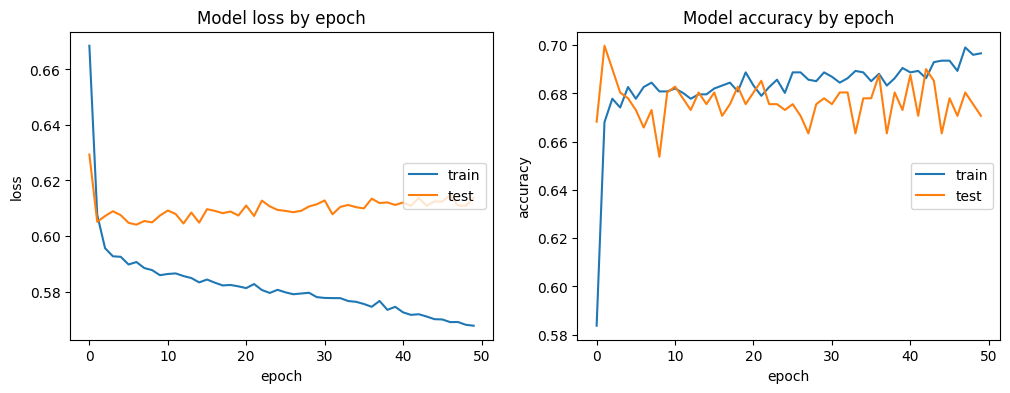

In [97]:
import keras
from keras.layers import Dense
import matplotlib.pyplot as plt

model = keras.Sequential()
model.add(Dense(X_train_filtered.shape[1]))
model.add(Dense(X_train_filtered.shape[1]*2))
model.add(Dense(X_train_filtered.shape[1], activation='sigmoid'))
#model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

earlystopping = keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.01,
    patience=30,
    mode='auto',
    baseline=None
)
model_folder = "./models/"

checkpoint = keras.callbacks.ModelCheckpoint(model_folder, 
                    monitor="accuracy", mode="max", 
                    save_weights_only=True,
                    save_best_only=True, verbose=1)

reduce_lr  = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    mode="auto",
    min_delta=0.0001,
    min_lr=0.001,
)

opt = keras.optimizers.Adam(learning_rate=0.001)


model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_filtered, y_train,                    
                        epochs = 50,                         
                        batch_size = 64,
                        callbacks=[earlystopping,reduce_lr, checkpoint],#earlystopping, reduce_lr       
                        validation_data=(X_test_filtered, y_test))   

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [98]:
from sklearn.metrics import accuracy_score
model.load_weights(model_folder)
y_predict = model.predict(X_test_filtered)

print('Accuracy :', accuracy_score(y_predict.round(), y_test))

13/13 [==============================] - 0s 500us/step
Accuracy : 0.6803874092009685


In [99]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

df_roi["proba_bookmaker"] = (1/df_roi.player1_oddsB365).round()
df_roi[["player1_name","player1_oddsB365","player2_name","player2_oddsB365", "y_test", "proba_bookmaker", "y_predict", "y_predict_proba",]]


,player1_name,player1_oddsB365,player2_name,player2_oddsB365,y_test,proba_bookmaker,y_predict,y_predict_proba
37,Tomas Berdych,1.05,Fred Gil,9.00,1,1.0,1.0,0.782431
2305,Andy Murray,1.07,Jeremy Chardy,9.00,1,1.0,1.0,0.919237
264,Alexandr Dolgopolov,8.00,Andy Murray,1.07,0,0.0,0.0,0.199599
721,Igor Andreev,1.33,Michael Russell,3.25,1,1.0,1.0,0.708834
2036,Kei Nishikori,2.50,Nicolas Almagro,1.50,1,0.0,0.0,0.214699
...,...,...,...,...,...,...,...,...
1377,Pablo Andujar,3.50,Ryan Sweeting,1.28,0,0.0,0.0,0.472191
2318,Roger Federer,1.12,Richard Gasquet,6.00,1,1.0,1.0,0.778849
1324,Maximo Gonzalez,5.00,Jarkko Nieminen,1.14,0,0.0,0.0,0.329304
1166,Andreas Seppi,3.25,Thomaz Bellucci,1.33,0,0.0,0.0,0.426895


In [100]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

#df_roi= df_roi.loc[df_roi["y_predict_proba"]>0.9]

money_invested=df_roi.shape[0]

money_won = 0.0
for index, row in df_roi.iterrows():
    if row.y_predict == row.y_test :
        if row.y_predict == 0 :
            money_won += row.player2_oddsB365
        else:
            money_won += row.player1_oddsB365

print("money spent:", money_invested,"€")
print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")

money spent: 413 €
money won: 401.13 €
TOTAL: -11.87 €
ROI: 97.13 %
